### Quick visualization of PFCLM Averaged Variables
Averages were computed from `compute_daily_PF_averages.py` and `compute_daily_CLM_averages.py` 

In order to quickly do a visual check of PFCLM run variables, this notebook 
1. Reads in averages of variables (PFB files)
2. Plots single CLM variable for one timestep (you can change variable, but would have to load in new pfb to check other timsteps here)  
5. Plots top Pressure at one timestep

In [1]:
## load PFCLM output and make plots / do analysis

from parflow import Run
from parflow.tools.io import read_pfb,write_pfb

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
#import glob
#import xarray as xr
#import time
import os

#from osgeo import gdal

In [2]:
directory_out = '/glade/p/univ/ucsm0002/CONUS2/CONUS2.spinup.WY2003/averages'
run_name = 'spinup.wy2003'

# #relative_path_to_runfolder = '/glade/scratch/tijerina/CONUS2/scaling_runs/spinup_scaling/outputs_r9_0-25_4'
# #run_name = 'spinup.scaling.9.70_54'

run = Run.from_definition('/glade/scratch/tijerina/CONUS2/spinup_WY2003/run_inputs/spinup.wy2003.pfidb')
data = run.data_accessor

# formatting the mask so that values outside the domain are NA and inside the domain are 1
# check with mask that has 0 and 1
mask = data.mask
active_mask=mask.copy()
active_mask[active_mask > 0] = 1


Solver: Field BinaryOutDir is not part of the expected schema <class 'parflow.tools.database.generated.Solver'>
Solver.OverlandKinematic: Field SeepageOne is not part of the expected schema <class 'parflow.tools.database.generated.OverlandKinematic'>
Solver.OverlandKinematic: Field SeepageTwo is not part of the expected schema <class 'parflow.tools.database.generated.OverlandKinematic'>
  - nt
  - sw_ini
  - hkdepth
  - wtfact
  - trsmx0
  - smpmax
  - pondmx


#### 1. Read in CLM, EvapTrans, and Pressure files (pfb)

In [3]:
# timestep of file you want to read
day = '200' #daily file, 3 digits, 001 == October 1 of Water Year

In [4]:
swe_pfb = np.squeeze(read_pfb(f'{directory_out}/swe_out.2003.daily.{day}.pfb'))
flow_pfb = np.squeeze(read_pfb(f'{directory_out}/flow.2003.daily.{day}.pfb'))
qflx_pfb = np.squeeze(read_pfb(f'{directory_out}/qflx_evap_tot.2003.daily.{day}.pfb'))
SM_pfb = np.squeeze(read_pfb(f'{directory_out}/SM.2003.daily.{day}.pfb'))
WTD_pfb = np.squeeze(read_pfb(f'{directory_out}/WTD.2003.daily.{day}.pfb'))

In [19]:
# ET as qflx and Soil Moisture are all 10 layers. Summing layers to get total
qflx_sum = np.sum(qflx_pfb, axis = 0)
SM_sum = np.sum(SM_pfb, axis = 0)

In [23]:
qflx_pfb.max()

nan

In [14]:
WTD_pfb

array([[292., 292., 292., ..., 292., 292., 292.],
       [292., 292., 292., ..., 292., 292., 292.],
       [292., 292., 292., ..., 292., 292., 292.],
       ...,
       [292., 292., 292., ..., 292., 292., 292.],
       [292., 292., 292., ..., 292., 292., 292.],
       [292., 292., 292., ..., 292., 292., 292.]])

### SWE

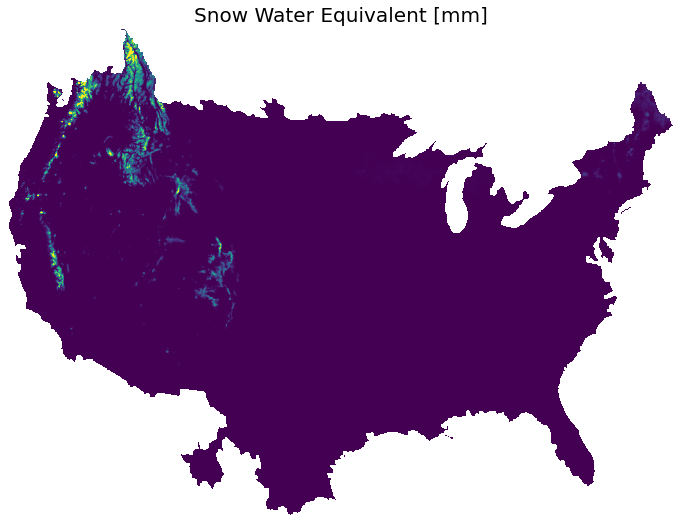

In [27]:
swe_pfb[active_mask[-1,...]==0]=np.nan 

fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot()
ax.imshow(swe_pfb, origin="lower", vmax = 1000)
plt.axis('off')
#plt.colorbar()
plt.title('Snow Water Equivalent [mm]', fontsize = 20)
plt.savefig('quickvis_SWE.png', dpi = 200, bbox_inches='tight')

### Flow

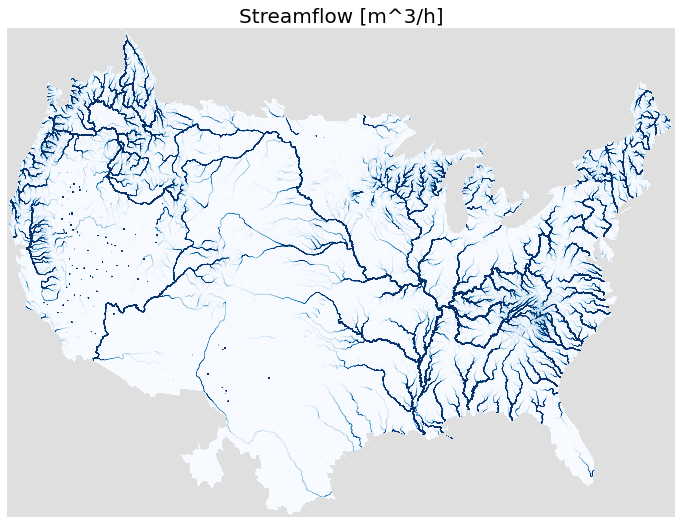

In [28]:
cmap_mask = plt.cm.Reds.copy()
cmap_mask.set_bad(color='grey')
flow_pfb[active_mask[-1,...]==0]=np.nan 

fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot()

ax.imshow(np.ma.masked_array(mask[-1,:,:],mask[-1,:,:]==0),origin='lower',cmap=cmap_mask,alpha=0.25)
ax.imshow(flow_pfb,origin='lower', cmap='Blues', vmin=0, vmax=1000000)

#ax.imshow(initial[layer,:,:],origin='lower',interpolation=None,vmin=vmin,vmax=vmax,cmap='Blues')
#plt.imshow(np.ma.masked_array(nanmask[-1,:,:],nanmask[-1,:,:]==0),origin='lower',cmap=cmap_mask,alpha=0.6)
#plt.imshow(np.ma.masked_array(pf_grid_flow_cms_day_avg, mask==1),origin='lower', vmax=0.5)
#plt.imshow(pf_grid_flow_cms_day_avg, cmap='Blues', origin='lower', vmin = 0, vmax = 0.5)
plt.axis('off')
#plt.colorbar()
plt.title('Streamflow [m^3/h]', fontsize = 20)

#plt.savefig(f'{plot_dir}/Average_daily_flow_for_October_WY2003_cms.png', dpi=300, bbox_inches='tight')
plt.savefig('quickvis_FLOW.png', dpi = 200, bbox_inches='tight')

### ET

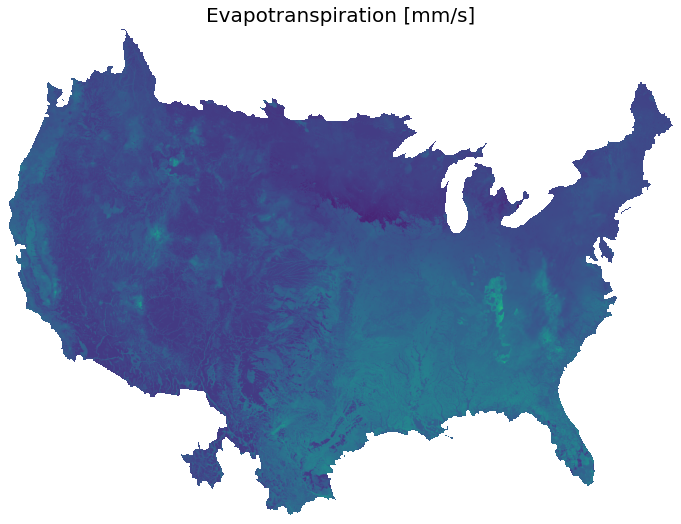

In [29]:
# Remove inactive area
qflx_pfb[active_mask[-1,...]==0]=np.nan 

# plot
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot()
ax.imshow(qflx_pfb, origin="lower", vmax = 0.003)
plt.axis('off')
plt.title('Evapotranspiration [mm/s]', fontsize = 20)
plt.savefig('quickvis_ET.png', dpi = 200, bbox_inches='tight')

### WTD

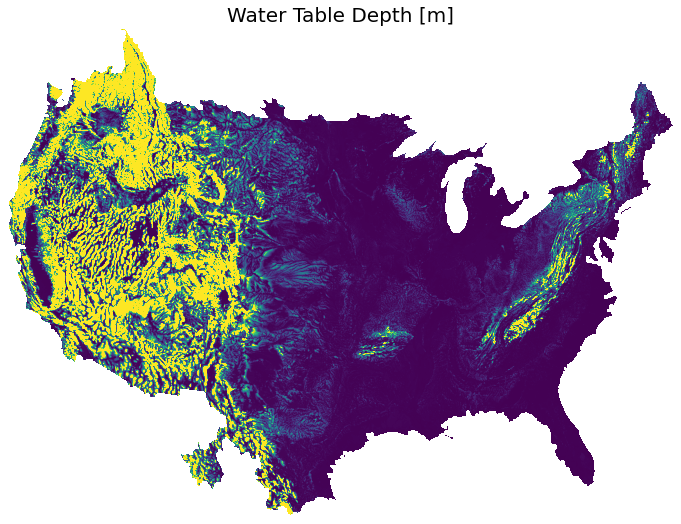

In [30]:
WTD_pfb[active_mask[-1,...]==0]=np.nan 

fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot()
ax.imshow(WTD_pfb, origin="lower", vmax = 100)
plt.axis('off')
#ax.colorbar()
plt.title('Water Table Depth [m]', fontsize = 20)
plt.savefig('quickvis_WTD.png', dpi = 200, bbox_inches='tight')

### Soil Moisture

(-0.5, 4441.5, -0.5, 3255.5)

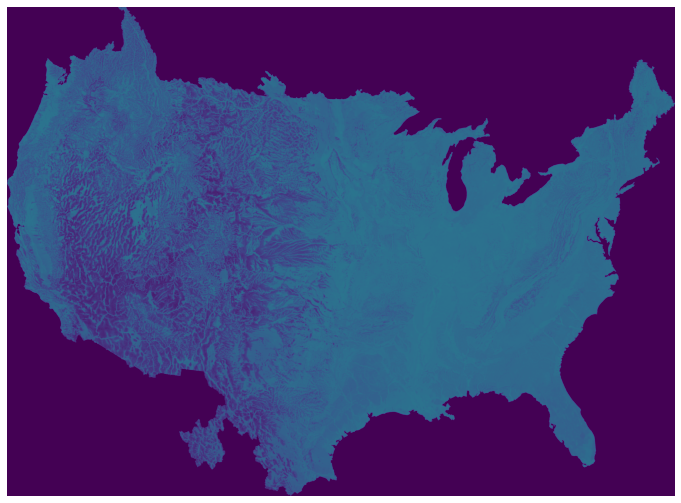

In [16]:
#SM_sum[active_mask[-1,...]==0]=np.nan 

fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot()
ax.imshow(SM_sum, origin="lower", vmax = 10)
plt.axis('off')
#plt.colorbar()
#plt.title(f'CLM variable {clm_var}, timestep {timestep}')

In [14]:
SM_sum.max()

3.9360000000000013